In [47]:
import numpy as np 
import pandas as pd

In [48]:
!pip install lxml

In [49]:
df = pd.read_html('https://en.wikipedia.org/wiki/Osaka#List_of_special_wards')[4]

In [50]:
df

,Unnamed: 0,Name,Kanji,Population,Land area in km2,Pop. density per km2,Map of Osaka
0,1,Abeno-ku,阿倍野区,107000,5.99,18440,NaN
1,2,Asahi-ku,旭区,90854,6.32,14376,NaN
2,3,Chūō-ku,中央区,100998,8.87,11386,NaN
3,4,Fukushima-ku,福島区,78348,4.67,16777,NaN
4,5,Higashinari-ku,東成区,83684,4.54,18433,NaN
5,6,Higashisumiyoshi-ku,東住吉区,126704,9.75,12995,NaN
6,7,Higashiyodogawa-ku,東淀川区,176943,13.27,13334,NaN
7,8,Hirano-ku,平野区,193282,15.28,12649,NaN
8,9,Ikuno-ku,生野区,129641,8.37,15489,NaN
9,10,Jōtō-ku,城東区,167925,8.38,20039,NaN


In [51]:
df_cleaned = df.drop(['Unnamed: 0', 'Map of Osaka'], axis=1)
df_cleaned

,Name,Kanji,Population,Land area in km2,Pop. density per km2
0,Abeno-ku,阿倍野区,107000,5.99,18440
1,Asahi-ku,旭区,90854,6.32,14376
2,Chūō-ku,中央区,100998,8.87,11386
3,Fukushima-ku,福島区,78348,4.67,16777
4,Higashinari-ku,東成区,83684,4.54,18433
5,Higashisumiyoshi-ku,東住吉区,126704,9.75,12995
6,Higashiyodogawa-ku,東淀川区,176943,13.27,13334
7,Hirano-ku,平野区,193282,15.28,12649
8,Ikuno-ku,生野区,129641,8.37,15489
9,Jōtō-ku,城東区,167925,8.38,20039


In [52]:
!pip install geopy

In [53]:
 from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
geolocator = Nominatim(user_agent="Osaka_explorer")

df_cleaned['Major_Dist_Coord']= df_cleaned['Kanji'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))
df_cleaned[['Latitude', 'Longitude']] = df_cleaned['Major_Dist_Coord'].apply(pd.Series)

df_cleaned.drop(['Major_Dist_Coord'], axis=1, inplace=True)
df_cleaned

,Name,Kanji,Population,Land area in km2,Pop. density per km2,Latitude,Longitude
0,Abeno-ku,阿倍野区,107000,5.99,18440,34.627501,135.514095
1,Asahi-ku,旭区,90854,6.32,14376,34.726483,135.546952
2,Chūō-ku,中央区,100998,8.87,11386,35.666255,139.775565
3,Fukushima-ku,福島区,78348,4.67,16777,34.692104,135.474812
4,Higashinari-ku,東成区,83684,4.54,18433,34.672912,135.550567
5,Higashisumiyoshi-ku,東住吉区,126704,9.75,12995,34.615662,135.531096
6,Higashiyodogawa-ku,東淀川区,176943,13.27,13334,34.740212,135.517432
7,Hirano-ku,平野区,193282,15.28,12649,34.603715,135.559027
8,Ikuno-ku,生野区,129641,8.37,15489,34.653003,135.547722
9,Jōtō-ku,城東区,167925,8.38,20039,34.693887,135.547769


In [54]:
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
!pip install folium
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!pip install folium
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


**Get the geographical coordinates of Osaka**

In [55]:
address = 'Osaka'

geolocator = Nominatim(user_agent="Osaka_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Osaka are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Osaka are 34.6198813, 135.490357.


**To visualize the neighborhoods in Osaka**

In [56]:
# create map of Osaka using latitude and longitude values
map_osaka = folium.Map(location=[latitude, longitude], zoom_start=11)

 # add markers to map
for lat, lng, label in zip(df_cleaned['Latitude'], df_cleaned['Longitude'], df_cleaned['Name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_osaka) 
    
map_osaka

In [57]:
CLIENT_ID = 'MQ0XIFC4T5X5MCUWN1M3VZ011RFZQPP5JZ1AO02PIIWJZPN0' # your Foursquare ID
CLIENT_SECRET = 'DO3SU02BKYOAAVWOWC33O2I5QZNZLI1ULXDJSWE4A0CHR5S5' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: MQ0XIFC4T5X5MCUWN1M3VZ011RFZQPP5JZ1AO02PIIWJZPN0
CLIENT_SECRET:DO3SU02BKYOAAVWOWC33O2I5QZNZLI1ULXDJSWE4A0CHR5S5


In [58]:
df_cleaned.loc[0, 'Name']

'Abeno-ku'

**Getting the top 100 venues that are in Abeno-ku within a radius of 500 meters**

In [59]:
neighborhood_latitude = df_cleaned.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df_cleaned.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = df_cleaned.loc[0, 'Name'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Abeno-ku are 34.627501, 135.514095.


In [60]:
LIMIT = 100

radius = 500

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=MQ0XIFC4T5X5MCUWN1M3VZ011RFZQPP5JZ1AO02PIIWJZPN0&client_secret=DO3SU02BKYOAAVWOWC33O2I5QZNZLI1ULXDJSWE4A0CHR5S5&v=20180604&ll=34.627501,135.514095&radius=500&limit=100'

In [61]:
results = requests.get(url).json()

In [62]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [63]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Usagi to Boku (うさぎとぼく),Coffee Shop,34.629734,135.515104
1,ライフ セントラルスクエア 北畠店,Supermarket,34.626273,135.509131
2,FamilyMart (ファミリーマート 阿倍野昭和町店),Convenience Store,34.627117,135.516143
3,7-Eleven (セブンイレブン 大阪阪南町3丁目店),Convenience Store,34.628868,135.514661
4,モスバーガー 昭和町店,Fast Food Restaurant,34.630623,135.516397


In [64]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

14 venues were returned by Foursquare.


In [65]:
print ('{} unique categories in Abeno-ku'.format(nearby_venues['categories'].value_counts().shape[0]))

11 unique categories in Abeno-ku


In [66]:
print (nearby_venues['categories'].value_counts()[0:10])

Convenience Store       4
Steakhouse              1
Park                    1
Café                    1
BBQ Joint               1
Art Gallery             1
Fast Food Restaurant    1
Coffee Shop             1
Supermarket             1
Spa                     1
Name: categories, dtype: int64


**Explore neighborhoods in Osaka**

In [67]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']

    
    return(nearby_venues)

In [68]:
Osaka_venues = getNearbyVenues(names=df['Name'],
                                   latitudes=df_cleaned['Latitude'],
                                   longitudes=df_cleaned['Longitude']
                                  )

Abeno-ku
Asahi-ku
Chūō-ku
Fukushima-ku
Higashinari-ku
Higashisumiyoshi-ku
Higashiyodogawa-ku
Hirano-ku
Ikuno-ku
Jōtō-ku
Kita-ku (administrative center)
Konohana-ku
Minato-ku
Miyakojima-ku
Naniwa-ku
Nishi-ku
Nishinari-ku
Nishiyodogawa-ku
Suminoe-ku
Sumiyoshi-ku
Taishō-ku
Tennōji-ku
Tsurumi-ku
Yodogawa-ku


In [69]:
# Create a Data-Frame out of it to Concentrate Only on Restaurants 

Osaka_Venues_only_restaurant = Osaka_venues[Osaka_venues['Venue Category'].str.contains('Restaurant')].reset_index(drop=True)
Osaka_Venues_only_restaurant.index = np.arange(1, len(Osaka_Venues_only_restaurant )+1)

In [70]:
print (Osaka_Venues_only_restaurant['Venue Category'].value_counts())

Japanese Restaurant          26
Sushi Restaurant             21
Ramen Restaurant             20
Chinese Restaurant           18
Donburi Restaurant           15
Fast Food Restaurant         13
Japanese Curry Restaurant    11
Italian Restaurant           10
Soba Restaurant               7
Restaurant                    5
Udon Restaurant               4
Yakitori Restaurant           3
French Restaurant             3
Unagi Restaurant              2
Indian Restaurant             2
Seafood Restaurant            2
Teishoku Restaurant           2
Kushikatsu Restaurant         2
Kaiseki Restaurant            1
Szechuan Restaurant           1
North Indian Restaurant       1
Thai Restaurant               1
Vietnamese Restaurant         1
Yoshoku Restaurant            1
Halal Restaurant              1
Dumpling Restaurant           1
Sri Lankan Restaurant         1
German Restaurant             1
Kebab Restaurant              1
Korean Restaurant             1
Spanish Restaurant            1
Tempura 

In [71]:
print('There are {} uniques categories.'.format(len(Osaka_Venues_only_restaurant['Venue Category'].unique())))

There are 35 uniques categories.


In [72]:
# create a dataframe of top 10 categories
Osaka_5_Dist_Venues_Top10 = Osaka_Venues_only_restaurant['Venue Category'].value_counts()[0:10].to_frame(name='frequency')
Osaka_5_Dist_Venues_Top10=Osaka_5_Dist_Venues_Top10.reset_index()
#Osaka_5_Dist_Venues_Top10

Osaka_5_Dist_Venues_Top10.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)
Osaka_5_Dist_Venues_Top10

,Venue_Category,Frequency
0,Japanese Restaurant,26
1,Sushi Restaurant,21
2,Ramen Restaurant,20
3,Chinese Restaurant,18
4,Donburi Restaurant,15
5,Fast Food Restaurant,13
6,Japanese Curry Restaurant,11
7,Italian Restaurant,10
8,Soba Restaurant,7
9,Restaurant,5


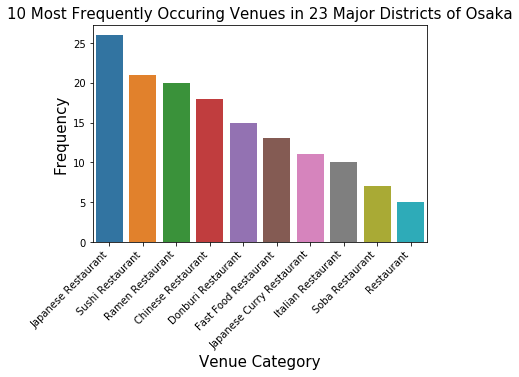

<Figure size 1296x504 with 0 Axes>

In [73]:
import seaborn as sns
from matplotlib import pyplot as plt

s=sns.barplot(x="Venue_Category", y="Frequency", data=Osaka_5_Dist_Venues_Top10)
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('10 Most Frequently Occuring Venues in 23 Major Districts of Osaka', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues1.png", dpi=300)
fig = plt.figure(figsize=(18,7))
plt.show()

In [74]:
print ("Shape of the Data-Frame with Venue Category only Restaurant: ", Osaka_Venues_only_restaurant.shape)
Osaka_Venues_only_restaurant.head(10)

Shape of the Data-Frame with Venue Category only Restaurant:  (183, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,Abeno-ku,34.627501,135.514095,モスバーガー 昭和町店,34.630623,135.516397,Fast Food Restaurant
2,Asahi-ku,34.726483,135.546952,MOS Burger (モスバーガー 千林大宮店),34.723827,135.549117,Fast Food Restaurant
3,Asahi-ku,34.726483,135.546952,なか卯 千林大宮店,34.724994,135.549546,Donburi Restaurant
4,Asahi-ku,34.726483,135.546952,松屋 千林大宮店,34.723866,135.549153,Donburi Restaurant
5,Asahi-ku,34.726483,135.546952,中国料理 風来坊,34.728689,135.544015,Chinese Restaurant
6,Asahi-ku,34.726483,135.546952,ネパールラーメン 金星,34.729080,135.544140,North Indian Restaurant
7,Asahi-ku,34.726483,135.546952,喫茶店 YAMA,34.729894,135.544316,Japanese Restaurant
8,Asahi-ku,34.726483,135.546952,力餅,34.728440,135.542616,Udon Restaurant
9,Chūō-ku,35.666255,139.775565,築地 すし大 別館,35.664831,139.774704,Sushi Restaurant
10,Chūō-ku,35.666255,139.775565,Tsukiji JISAKU (つきじ治作),35.665236,139.777358,Japanese Restaurant


In [75]:
Osaka_Venues_restaurant = Osaka_Venues_only_restaurant.groupby(['Neighborhood'])['Venue Category'].apply(lambda x: x[x.str.contains('Restaurant')].count())

In [76]:
Osaka_Venues_restaurant

Neighborhood
Abeno-ku                            1
Asahi-ku                            7
Chūō-ku                            58
Fukushima-ku                       20
Higashisumiyoshi-ku                 6
Higashiyodogawa-ku                 12
Hirano-ku                           1
Ikuno-ku                            2
Jōtō-ku                             3
Kita-ku (administrative center)    10
Minato-ku                          11
Miyakojima-ku                      12
Naniwa-ku                           6
Nishi-ku                           11
Nishinari-ku                        2
Nishiyodogawa-ku                    4
Suminoe-ku                          4
Sumiyoshi-ku                        2
Taishō-ku                           5
Tennōji-ku                          4
Yodogawa-ku                         2
Name: Venue Category, dtype: int64

In [77]:
Osaka_Venues_restaurant_df  = Osaka_Venues_restaurant.to_frame().reset_index()
Osaka_Venues_restaurant_df.columns = ['Neighborhood', 'Number of Restaurant']
Osaka_Venues_restaurant_df.index = np.arange(1, len(Osaka_Venues_restaurant_df)+1)
list_rest_no =Osaka_Venues_restaurant_df['Number of Restaurant'].to_list()
list_dist =Osaka_Venues_restaurant_df['Neighborhood'].to_list()
#print (list_rest_no)
#print (list_dist)
print(list_rest_no)
print(list_dist)

[1, 7, 58, 20, 6, 12, 1, 2, 3, 10, 11, 12, 6, 11, 2, 4, 4, 2, 5, 4, 2]
['Abeno-ku', 'Asahi-ku', 'Chūō-ku', 'Fukushima-ku', 'Higashisumiyoshi-ku', 'Higashiyodogawa-ku', 'Hirano-ku', 'Ikuno-ku', 'Jōtō-ku', 'Kita-ku (administrative center)', 'Minato-ku', 'Miyakojima-ku', 'Naniwa-ku', 'Nishi-ku', 'Nishinari-ku', 'Nishiyodogawa-ku', 'Suminoe-ku', 'Sumiyoshi-ku', 'Taishō-ku', 'Tennōji-ku', 'Yodogawa-ku']


In [93]:
Osaka_onehot = pd.get_dummies(Osaka_Venues_only_restaurant[['Venue Category']], prefix="", prefix_sep="")
Osaka_onehot['Neighborhood'] = Osaka_Venues_only_restaurant['Neighborhood'] 

In [94]:
fixed_columns = [Osaka_onehot.columns[-1]] + Osaka_5_Dist_Venues_restaurant_df = Osaka_5_Dist_Venues_restaurant.to_frame().reset_index()
Osaka_5_Dist_Venues_restaurant_df.columns = ['District', 'Number of Restaurant'](Osaka_onehot.columns[:-1])
Osaka_onehot = Osaka_onehot[fixed_columns]

Osaka_onehot.head()

SyntaxError: can't assign to operator (<ipython-input-94-df124b84e258>, line 1)

In [95]:
Osaka_onehot.shape

(183, 36)

In [96]:
Osaka_grouped = Osaka_onehot.groupby('Neighborhood').mean().reset_index()
Osaka_grouped

,Neighborhood,Chinese Restaurant,Donburi Restaurant,Dumpling Restaurant,Fast Food Restaurant,French Restaurant,German Restaurant,Halal Restaurant,Indian Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Kaiseki Restaurant,Kebab Restaurant,Korean Restaurant,Kosher Restaurant,Kushikatsu Restaurant,Mexican Restaurant,North Indian Restaurant,Ramen Restaurant,Restaurant,Seafood Restaurant,Soba Restaurant,Spanish Restaurant,Sri Lankan Restaurant,Sushi Restaurant,Szechuan Restaurant,Teishoku Restaurant,Tempura Restaurant,Thai Restaurant,Tonkatsu Restaurant,Udon Restaurant,Unagi Restaurant,Vietnamese Restaurant,Yakitori Restaurant,Yoshoku Restaurant
0,Abeno-ku,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Asahi-ku,0.142857,0.285714,0.0,0.142857,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000
2,Chūō-ku,0.017241,0.034483,0.0,0.000000,0.017241,0.017241,0.00,0.017241,0.051724,0.017241,0.224138,0.000000,0.000000,0.000000,0.000000,0.017241,0.000000,0.000000,0.034483,0.000000,0.034483,0.068966,0.017241,0.000000,0.327586,0.000000,0.000000,0.017241,0.00,0.017241,0.000000,0.034483,0.000000,0.017241,0.017241
3,Fukushima-ku,0.150000,0.150000,0.0,0.200000,0.000000,0.000000,0.00,0.000000,0.100000,0.050000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.150000,0.050000,0.000000,0.000000,0.000000,0.000000,0.050000,0.000000,0.000000,0.000000,0.00,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000
4,Higashisumiyoshi-ku,0.333333,0.000000,0.0,0.166667,0.000000,0.000000,0.00,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000
5,Higashiyodogawa-ku,0.333333,0.083333,0.0,0.083333,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000
6,Hirano-ku,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Ikuno-ku,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
8,Jōtō-ku,0.333333,0.000000,0.0,0.333333,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,Kita-ku (administrative center),0.000000,0.000000,0.1,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [97]:
Osaka_grouped.shape

(21, 36)

In [98]:
num_top_venues = 5

for hood in Osaka_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Osaka_grouped[Osaka_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Abeno-ku----
                  venue  freq
0  Fast Food Restaurant   1.0
1    Chinese Restaurant   0.0
2   Teishoku Restaurant   0.0
3    Seafood Restaurant   0.0
4       Soba Restaurant   0.0


----Asahi-ku----
                     venue  freq
0       Donburi Restaurant  0.29
1       Chinese Restaurant  0.14
2      Japanese Restaurant  0.14
3          Udon Restaurant  0.14
4  North Indian Restaurant  0.14


----Chūō-ku----
                 venue  freq
0     Sushi Restaurant  0.33
1  Japanese Restaurant  0.22
2      Soba Restaurant  0.07
3   Italian Restaurant  0.05
4     Unagi Restaurant  0.03


----Fukushima-ku----
                  venue  freq
0  Fast Food Restaurant  0.20
1    Chinese Restaurant  0.15
2      Ramen Restaurant  0.15
3    Donburi Restaurant  0.15
4    Italian Restaurant  0.10


----Higashisumiyoshi-ku----
                       venue  freq
0         Chinese Restaurant  0.33
1      Vietnamese Restaurant  0.17
2        Szechuan Restaurant  0.17
3  Japanese Curry Res

In [99]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [100]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Osaka_grouped['Neighborhood']

for ind in np.arange(Osaka_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Osaka_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(23)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Abeno-ku,Fast Food Restaurant,Yoshoku Restaurant,Italian Restaurant,Kosher Restaurant,Korean Restaurant,Kebab Restaurant,Kaiseki Restaurant,Japanese Restaurant,Japanese Curry Restaurant,Indian Restaurant
1,Asahi-ku,Donburi Restaurant,North Indian Restaurant,Japanese Restaurant,Fast Food Restaurant,Chinese Restaurant,Udon Restaurant,Tonkatsu Restaurant,Thai Restaurant,Vietnamese Restaurant,Dumpling Restaurant
2,Chūō-ku,Sushi Restaurant,Japanese Restaurant,Soba Restaurant,Italian Restaurant,Ramen Restaurant,Donburi Restaurant,Unagi Restaurant,Seafood Restaurant,Yoshoku Restaurant,French Restaurant
3,Fukushima-ku,Fast Food Restaurant,Chinese Restaurant,Donburi Restaurant,Ramen Restaurant,Italian Restaurant,Japanese Curry Restaurant,Udon Restaurant,Restaurant,Japanese Restaurant,Sushi Restaurant
4,Higashisumiyoshi-ku,Chinese Restaurant,Fast Food Restaurant,Japanese Curry Restaurant,Szechuan Restaurant,Vietnamese Restaurant,Dumpling Restaurant,Donburi Restaurant,French Restaurant,German Restaurant,Halal Restaurant
5,Higashiyodogawa-ku,Chinese Restaurant,Japanese Restaurant,Ramen Restaurant,Fast Food Restaurant,Yakitori Restaurant,Donburi Restaurant,French Restaurant,German Restaurant,Halal Restaurant,Indian Restaurant
6,Hirano-ku,Japanese Restaurant,Yoshoku Restaurant,Italian Restaurant,Kosher Restaurant,Korean Restaurant,Kebab Restaurant,Kaiseki Restaurant,Japanese Curry Restaurant,Indian Restaurant,Mexican Restaurant
7,Ikuno-ku,Italian Restaurant,Udon Restaurant,Yoshoku Restaurant,Kosher Restaurant,Korean Restaurant,Kebab Restaurant,Kaiseki Restaurant,Japanese Restaurant,Japanese Curry Restaurant,Indian Restaurant
8,Jōtō-ku,Chinese Restaurant,Fast Food Restaurant,Japanese Restaurant,Italian Restaurant,Kosher Restaurant,Korean Restaurant,Kebab Restaurant,Kaiseki Restaurant,Japanese Curry Restaurant,Indian Restaurant
9,Kita-ku (administrative center),Ramen Restaurant,Dumpling Restaurant,Japanese Restaurant,Teishoku Restaurant,Kushikatsu Restaurant,Yoshoku Restaurant,Japanese Curry Restaurant,Korean Restaurant,Kebab Restaurant,Kaiseki Restaurant


**Custer Neighborhoods**

In [101]:
# set number of clusters
kclusters = 5

Osaka_grouped_clustering = Osaka_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Osaka_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 0, 0, 0, 0, 0, 3, 2, 0, 4], dtype=int32)

In [102]:
# add clustering labels

neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Osaka_merged = df_cleaned

Osaka_merged.rename(columns={'Name':'Neighborhood'}, inplace=True)

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Osaka_merged = Osaka_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

Osaka_merged.head() # check the last columns!


,Neighborhood,Kanji,Population,Land area in km2,Pop. density per km2,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Abeno-ku,阿倍野区,107000,5.99,18440,34.627501,135.514095,1.0,Fast Food Restaurant,Yoshoku Restaurant,Italian Restaurant,Kosher Restaurant,Korean Restaurant,Kebab Restaurant,Kaiseki Restaurant,Japanese Restaurant,Japanese Curry Restaurant,Indian Restaurant
1,Asahi-ku,旭区,90854,6.32,14376,34.726483,135.546952,0.0,Donburi Restaurant,North Indian Restaurant,Japanese Restaurant,Fast Food Restaurant,Chinese Restaurant,Udon Restaurant,Tonkatsu Restaurant,Thai Restaurant,Vietnamese Restaurant,Dumpling Restaurant
2,Chūō-ku,中央区,100998,8.87,11386,35.666255,139.775565,0.0,Sushi Restaurant,Japanese Restaurant,Soba Restaurant,Italian Restaurant,Ramen Restaurant,Donburi Restaurant,Unagi Restaurant,Seafood Restaurant,Yoshoku Restaurant,French Restaurant
3,Fukushima-ku,福島区,78348,4.67,16777,34.692104,135.474812,0.0,Fast Food Restaurant,Chinese Restaurant,Donburi Restaurant,Ramen Restaurant,Italian Restaurant,Japanese Curry Restaurant,Udon Restaurant,Restaurant,Japanese Restaurant,Sushi Restaurant
4,Higashinari-ku,東成区,83684,4.54,18433,34.672912,135.550567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
Osaka_merged_cleaned = Osaka_merged.fillna(0)
Osaka_merged_cleaned

,Neighborhood,Kanji,Population,Land area in km2,Pop. density per km2,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Abeno-ku,阿倍野区,107000,5.99,18440,34.627501,135.514095,1.0,Fast Food Restaurant,Yoshoku Restaurant,Italian Restaurant,Kosher Restaurant,Korean Restaurant,Kebab Restaurant,Kaiseki Restaurant,Japanese Restaurant,Japanese Curry Restaurant,Indian Restaurant
1,Asahi-ku,旭区,90854,6.32,14376,34.726483,135.546952,0.0,Donburi Restaurant,North Indian Restaurant,Japanese Restaurant,Fast Food Restaurant,Chinese Restaurant,Udon Restaurant,Tonkatsu Restaurant,Thai Restaurant,Vietnamese Restaurant,Dumpling Restaurant
2,Chūō-ku,中央区,100998,8.87,11386,35.666255,139.775565,0.0,Sushi Restaurant,Japanese Restaurant,Soba Restaurant,Italian Restaurant,Ramen Restaurant,Donburi Restaurant,Unagi Restaurant,Seafood Restaurant,Yoshoku Restaurant,French Restaurant
3,Fukushima-ku,福島区,78348,4.67,16777,34.692104,135.474812,0.0,Fast Food Restaurant,Chinese Restaurant,Donburi Restaurant,Ramen Restaurant,Italian Restaurant,Japanese Curry Restaurant,Udon Restaurant,Restaurant,Japanese Restaurant,Sushi Restaurant
4,Higashinari-ku,東成区,83684,4.54,18433,34.672912,135.550567,0.0,0,0,0,0,0,0,0,0,0,0
5,Higashisumiyoshi-ku,東住吉区,126704,9.75,12995,34.615662,135.531096,0.0,Chinese Restaurant,Fast Food Restaurant,Japanese Curry Restaurant,Szechuan Restaurant,Vietnamese Restaurant,Dumpling Restaurant,Donburi Restaurant,French Restaurant,German Restaurant,Halal Restaurant
6,Higashiyodogawa-ku,東淀川区,176943,13.27,13334,34.740212,135.517432,0.0,Chinese Restaurant,Japanese Restaurant,Ramen Restaurant,Fast Food Restaurant,Yakitori Restaurant,Donburi Restaurant,French Restaurant,German Restaurant,Halal Restaurant,Indian Restaurant
7,Hirano-ku,平野区,193282,15.28,12649,34.603715,135.559027,3.0,Japanese Restaurant,Yoshoku Restaurant,Italian Restaurant,Kosher Restaurant,Korean Restaurant,Kebab Restaurant,Kaiseki Restaurant,Japanese Curry Restaurant,Indian Restaurant,Mexican Restaurant
8,Ikuno-ku,生野区,129641,8.37,15489,34.653003,135.547722,2.0,Italian Restaurant,Udon Restaurant,Yoshoku Restaurant,Kosher Restaurant,Korean Restaurant,Kebab Restaurant,Kaiseki Restaurant,Japanese Restaurant,Japanese Curry Restaurant,Indian Restaurant
9,Jōtō-ku,城東区,167925,8.38,20039,34.693887,135.547769,0.0,Chinese Restaurant,Fast Food Restaurant,Japanese Restaurant,Italian Restaurant,Kosher Restaurant,Korean Restaurant,Kebab Restaurant,Kaiseki Restaurant,Japanese Curry Restaurant,Indian Restaurant


In [122]:
Osaka_merged_final = Osaka_merged_cleaned.drop(Osaka_merged_cleaned.index[[4,11,22]])
Osaka_merged_final

,Neighborhood,Kanji,Population,Land area in km2,Pop. density per km2,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Abeno-ku,阿倍野区,107000,5.99,18440,34.627501,135.514095,1.0,Fast Food Restaurant,Yoshoku Restaurant,Italian Restaurant,Kosher Restaurant,Korean Restaurant,Kebab Restaurant,Kaiseki Restaurant,Japanese Restaurant,Japanese Curry Restaurant,Indian Restaurant
1,Asahi-ku,旭区,90854,6.32,14376,34.726483,135.546952,0.0,Donburi Restaurant,North Indian Restaurant,Japanese Restaurant,Fast Food Restaurant,Chinese Restaurant,Udon Restaurant,Tonkatsu Restaurant,Thai Restaurant,Vietnamese Restaurant,Dumpling Restaurant
2,Chūō-ku,中央区,100998,8.87,11386,35.666255,139.775565,0.0,Sushi Restaurant,Japanese Restaurant,Soba Restaurant,Italian Restaurant,Ramen Restaurant,Donburi Restaurant,Unagi Restaurant,Seafood Restaurant,Yoshoku Restaurant,French Restaurant
3,Fukushima-ku,福島区,78348,4.67,16777,34.692104,135.474812,0.0,Fast Food Restaurant,Chinese Restaurant,Donburi Restaurant,Ramen Restaurant,Italian Restaurant,Japanese Curry Restaurant,Udon Restaurant,Restaurant,Japanese Restaurant,Sushi Restaurant
5,Higashisumiyoshi-ku,東住吉区,126704,9.75,12995,34.615662,135.531096,0.0,Chinese Restaurant,Fast Food Restaurant,Japanese Curry Restaurant,Szechuan Restaurant,Vietnamese Restaurant,Dumpling Restaurant,Donburi Restaurant,French Restaurant,German Restaurant,Halal Restaurant
6,Higashiyodogawa-ku,東淀川区,176943,13.27,13334,34.740212,135.517432,0.0,Chinese Restaurant,Japanese Restaurant,Ramen Restaurant,Fast Food Restaurant,Yakitori Restaurant,Donburi Restaurant,French Restaurant,German Restaurant,Halal Restaurant,Indian Restaurant
7,Hirano-ku,平野区,193282,15.28,12649,34.603715,135.559027,3.0,Japanese Restaurant,Yoshoku Restaurant,Italian Restaurant,Kosher Restaurant,Korean Restaurant,Kebab Restaurant,Kaiseki Restaurant,Japanese Curry Restaurant,Indian Restaurant,Mexican Restaurant
8,Ikuno-ku,生野区,129641,8.37,15489,34.653003,135.547722,2.0,Italian Restaurant,Udon Restaurant,Yoshoku Restaurant,Kosher Restaurant,Korean Restaurant,Kebab Restaurant,Kaiseki Restaurant,Japanese Restaurant,Japanese Curry Restaurant,Indian Restaurant
9,Jōtō-ku,城東区,167925,8.38,20039,34.693887,135.547769,0.0,Chinese Restaurant,Fast Food Restaurant,Japanese Restaurant,Italian Restaurant,Kosher Restaurant,Korean Restaurant,Kebab Restaurant,Kaiseki Restaurant,Japanese Curry Restaurant,Indian Restaurant
10,Kita-ku (administrative center),北区,136602,10.34,13211,35.755838,139.736687,4.0,Ramen Restaurant,Dumpling Restaurant,Japanese Restaurant,Teishoku Restaurant,Kushikatsu Restaurant,Yoshoku Restaurant,Japanese Curry Restaurant,Korean Restaurant,Kebab Restaurant,Kaiseki Restaurant


In [131]:
# create map
map_restaurants10 = folium.Map(location=[latitude,longitude], tiles='cartodbpositron', 
                               attr="<a href=https://github.com/python-visualization/folium/>Folium</a>")

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
#rainbow = ['#00ff00', '#ff00ff','#0000ff','#ffa500' ,'#ff0000']
#Districts = ['Nagatacho', 'Nihonbashi', 'Shinjuku', 'Shinagawa', 'Shibuya']

# add markers to the map
for lat, lon, poi, cluster in zip(Osaka_merged_final['Latitude'], 
                                  Osaka_merged_final['Longitude'], 
                                  Osaka_merged_final['Neighborhood'], 
                                  Osaka_merged_final['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=list_rest_no[list_dist.index(poi)]*0.5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_restaurants10)
       
map_restaurants10

**Examine the clusters**

In [126]:
#cluster 1
Osaka_merged_final.loc[Osaka_merged_final['Cluster Labels'] == 0, Osaka_merged_final.columns[[1] + list(range(5, Osaka_merged_final.shape[1]))]]

,Kanji,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,旭区,34.726483,135.546952,0.0,Donburi Restaurant,North Indian Restaurant,Japanese Restaurant,Fast Food Restaurant,Chinese Restaurant,Udon Restaurant,Tonkatsu Restaurant,Thai Restaurant,Vietnamese Restaurant,Dumpling Restaurant
2,中央区,35.666255,139.775565,0.0,Sushi Restaurant,Japanese Restaurant,Soba Restaurant,Italian Restaurant,Ramen Restaurant,Donburi Restaurant,Unagi Restaurant,Seafood Restaurant,Yoshoku Restaurant,French Restaurant
3,福島区,34.692104,135.474812,0.0,Fast Food Restaurant,Chinese Restaurant,Donburi Restaurant,Ramen Restaurant,Italian Restaurant,Japanese Curry Restaurant,Udon Restaurant,Restaurant,Japanese Restaurant,Sushi Restaurant
5,東住吉区,34.615662,135.531096,0.0,Chinese Restaurant,Fast Food Restaurant,Japanese Curry Restaurant,Szechuan Restaurant,Vietnamese Restaurant,Dumpling Restaurant,Donburi Restaurant,French Restaurant,German Restaurant,Halal Restaurant
6,東淀川区,34.740212,135.517432,0.0,Chinese Restaurant,Japanese Restaurant,Ramen Restaurant,Fast Food Restaurant,Yakitori Restaurant,Donburi Restaurant,French Restaurant,German Restaurant,Halal Restaurant,Indian Restaurant
9,城東区,34.693887,135.547769,0.0,Chinese Restaurant,Fast Food Restaurant,Japanese Restaurant,Italian Restaurant,Kosher Restaurant,Korean Restaurant,Kebab Restaurant,Kaiseki Restaurant,Japanese Curry Restaurant,Indian Restaurant
12,港区,35.643227,139.740055,0.0,Soba Restaurant,Chinese Restaurant,Indian Restaurant,Kosher Restaurant,Kebab Restaurant,Kaiseki Restaurant,Japanese Restaurant,Yakitori Restaurant,French Restaurant,Halal Restaurant
13,都島区,34.712703,135.529697,0.0,Japanese Restaurant,Ramen Restaurant,Chinese Restaurant,Japanese Curry Restaurant,Restaurant,Korean Restaurant,Italian Restaurant,Fast Food Restaurant,Donburi Restaurant,Halal Restaurant
15,西区,34.674598,135.476774,0.0,Japanese Curry Restaurant,Donburi Restaurant,Ramen Restaurant,Chinese Restaurant,Fast Food Restaurant,French Restaurant,Teishoku Restaurant,Sri Lankan Restaurant,Korean Restaurant,Kebab Restaurant
16,西成区,34.639074,135.490813,0.0,Chinese Restaurant,Donburi Restaurant,Italian Restaurant,Kosher Restaurant,Korean Restaurant,Kebab Restaurant,Kaiseki Restaurant,Japanese Restaurant,Japanese Curry Restaurant,Indian Restaurant


In [127]:
#Cluster 2
Osaka_merged_final.loc[Osaka_merged_final['Cluster Labels'] == 1, Osaka_merged_final.columns[[1] + list(range(5, Osaka_merged_final.shape[1]))]]

,Kanji,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,阿倍野区,34.627501,135.514095,1.0,Fast Food Restaurant,Yoshoku Restaurant,Italian Restaurant,Kosher Restaurant,Korean Restaurant,Kebab Restaurant,Kaiseki Restaurant,Japanese Restaurant,Japanese Curry Restaurant,Indian Restaurant


In [128]:
#Cluster 3
Osaka_merged_final.loc[Osaka_merged_final['Cluster Labels'] == 2, Osaka_merged_final.columns[[1] + list(range(5, Osaka_merged_final.shape[1]))]]

,Kanji,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,生野区,34.653003,135.547722,2.0,Italian Restaurant,Udon Restaurant,Yoshoku Restaurant,Kosher Restaurant,Korean Restaurant,Kebab Restaurant,Kaiseki Restaurant,Japanese Restaurant,Japanese Curry Restaurant,Indian Restaurant
18,住之江区,34.614132,135.466545,2.0,Italian Restaurant,Restaurant,Japanese Restaurant,Japanese Curry Restaurant,Mexican Restaurant,Kosher Restaurant,Korean Restaurant,Kebab Restaurant,Kaiseki Restaurant,Yoshoku Restaurant
19,住吉区,34.599765,135.506426,2.0,Italian Restaurant,Restaurant,Mexican Restaurant,Kosher Restaurant,Korean Restaurant,Kebab Restaurant,Kaiseki Restaurant,Japanese Restaurant,Japanese Curry Restaurant,Yoshoku Restaurant
21,天王寺区,34.655043,135.518370,2.0,Chinese Restaurant,Japanese Curry Restaurant,Restaurant,Italian Restaurant,Fast Food Restaurant,French Restaurant,German Restaurant,Halal Restaurant,Indian Restaurant,Mexican Restaurant


In [129]:
#Cluster 4
Osaka_merged_final.loc[Osaka_merged_final['Cluster Labels'] == 3, Osaka_merged_final.columns[[1] + list(range(5, Osaka_merged_final.shape[1]))]]

,Kanji,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,平野区,34.603715,135.559027,3.0,Japanese Restaurant,Yoshoku Restaurant,Italian Restaurant,Kosher Restaurant,Korean Restaurant,Kebab Restaurant,Kaiseki Restaurant,Japanese Curry Restaurant,Indian Restaurant,Mexican Restaurant


In [130]:
#Cluster 5
Osaka_merged_final.loc[Osaka_merged_final['Cluster Labels'] == 4, Osaka_merged_final.columns[[1] + list(range(5, Osaka_merged_final.shape[1]))]]

,Kanji,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,北区,35.755838,139.736687,4.0,Ramen Restaurant,Dumpling Restaurant,Japanese Restaurant,Teishoku Restaurant,Kushikatsu Restaurant,Yoshoku Restaurant,Japanese Curry Restaurant,Korean Restaurant,Kebab Restaurant,Kaiseki Restaurant
14,浪速区,34.662830,135.490485,4.0,Japanese Curry Restaurant,Ramen Restaurant,Mexican Restaurant,Yoshoku Restaurant,Kosher Restaurant,Korean Restaurant,Kebab Restaurant,Kaiseki Restaurant,Japanese Restaurant,Italian Restaurant
23,淀川区,34.726613,135.483397,4.0,Ramen Restaurant,Udon Restaurant,Yoshoku Restaurant,Italian Restaurant,Korean Restaurant,Kebab Restaurant,Kaiseki Restaurant,Japanese Restaurant,Japanese Curry Restaurant,Indian Restaurant
